In [10]:
!pip install pandas numpy scikit-learn seaborn matplotlib

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



*   pandas & numpy: For data manipulation

*   sklearn: For machine learning tools
*   seaborn & matplotlib: For visualization









In [12]:
# Step 1: Load and preprocess the dataset
# Load the dataset
df = pd.read_csv('diabetes.csv')

In [13]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nBasic statistics:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66

In [14]:
# Handle missing values (replace 0 with median for certain features)
features_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for feature in features_to_fix:
    median = df[feature].replace(0, np.nan).median()
    df[feature] = df[feature].replace(0, median)

In [15]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']




*   Replaces 0 values with median values (as they likely represent missing data)

*   Separates features (X) from target variable (y)





In [16]:
# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




*   Splits data into 80% training, 20% testing

*   Standardizes features to have mean=0 and variance=1





In [18]:
# Step 4: Train the model (using Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [19]:
# Step 5: Make predictions
y_pred = rf_model.predict(X_test_scaled)




*   Creates and trains Random Forest model
*   Makes predictions on test data



In [20]:
# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [21]:
# Print the results
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")



Model Performance Metrics:
Accuracy: 0.734
Precision: 0.625
Recall: 0.636
F1-score: 0.631


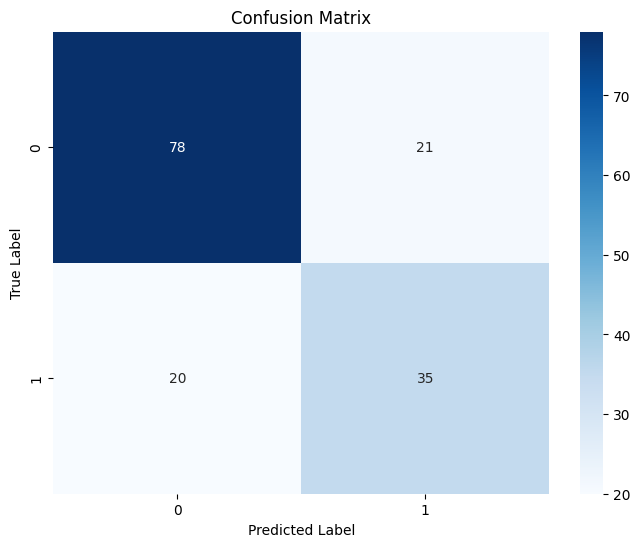

In [22]:
# Create and plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()




*   Creates visual representation of model's predictions
*   Shows true positives, false positives, true negatives, false negatives





In [23]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)


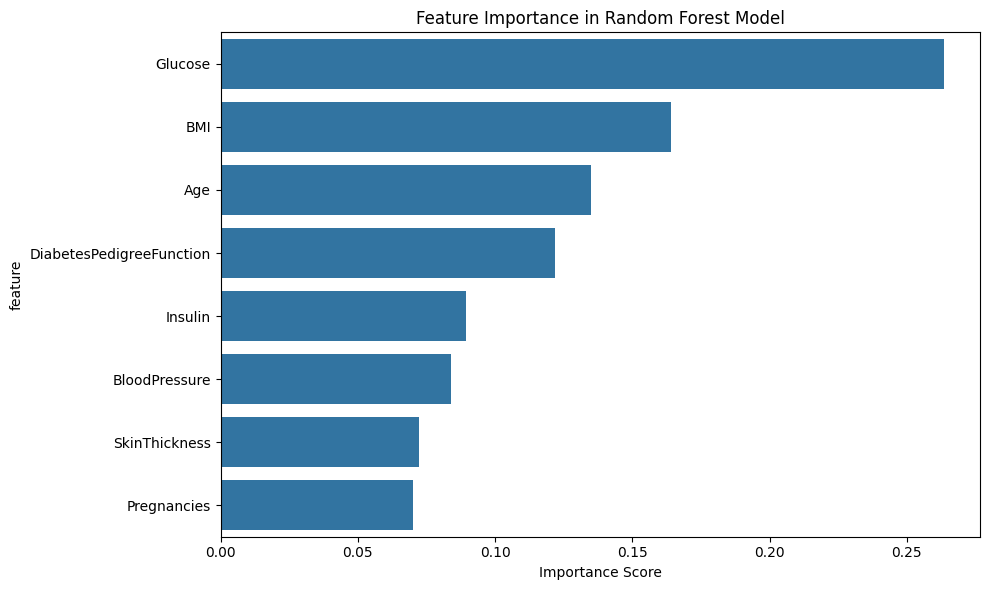

In [24]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()




*   Shows which features are most important for predictions
*   Visualizes feature importance scores





In [25]:
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                    feature  importance
1                   Glucose    0.263453
5                       BMI    0.164118
7                       Age    0.134927
6  DiabetesPedigreeFunction    0.121819
4                   Insulin    0.089248
2             BloodPressure    0.084062
3             SkinThickness    0.072432
0               Pregnancies    0.069942
